### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [16]:
data = pd.read_csv('data/coupons.csv')

In [17]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [18]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [20]:
# Remove column "car" from the dataframe, as it has very little data and is irrelevant to our analysis

data_clean = data.drop('car', axis=1)

# Replace null data in all columns with "unknown"

data_clean.fillna('unknown', inplace=True)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [53]:
# Using np.sum() calculate the number of observations that accepted the coupon and divide it by the total observations

proportion_accepted = np.sum(data_clean['Y'] == 1) / len(data_clean['Y'])
proportion_accepted

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

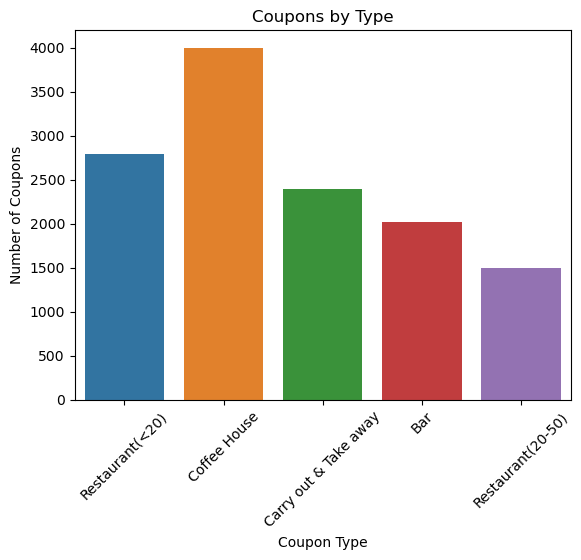

In [262]:
# Using seaborn countplot create a simple bar chart with Coupon Type on x-axis and Number of Coupons on y-axis

sns.countplot(x='coupon', data=data_clean)
plt.xlabel('Coupon Type')
plt.ylabel('Number of Coupons')
plt.title('Coupons by Type')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Number of Observations at Different Temperatures')

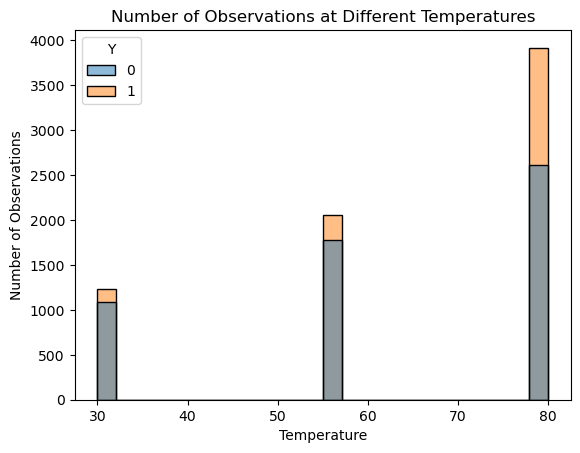

In [56]:
# Using seaborn create a histogram to visualize the temperature column
# For extra credit, split the data by coupon acceptance

sns.histplot(x='temperature', data=data_clean, hue='Y')
plt.xlabel('Temperature')
plt.ylabel('Number of Observations')
plt.title('Number of Observations at Different Temperatures')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [256]:
data_bar = data_clean[data_clean['coupon']=='Bar']
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [69]:
# Instead of dividing the number of bar coupons accepted by the total bar coupons, I used np.mean() on column "Y"
# It produces the same result with a shorter code, by calculating the average between "0" and "1" in column "Y"

bar_coupon_accepted = np.mean(data_bar['Y'])
bar_coupon_accepted

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [247]:
# Acceptance rate for drivers who went to bar 3 or fewer times a month

less3 = data_bar.loc[data_bar['Bar'].isin(['1~3','less1','never']), :]
less3_accept = np.mean(less3['Y'])
less3_accept

0.37061769616026713

In [249]:
# Acceptance rate for drivers who went to bar 4 or more times a month

more4 = data_bar.loc[data_bar['Bar'].isin(['4~8','gt8']), :]
more4_accept = np.mean(more4['Y'])
more4_accept

0.7688442211055276

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, 'unknown'),
  Text(5, 0, '4~8')])

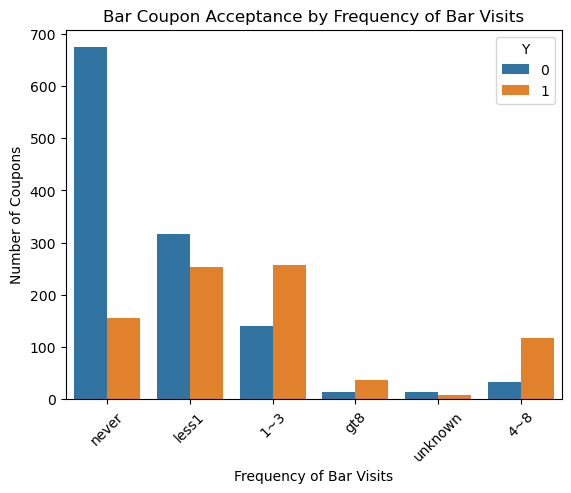

In [388]:
# Create a barplot that demonstrates the acceptance rate of bar coupon by frequency of bar visits

sns.countplot(x='Bar', data=data_bar, hue='Y')
plt.xlabel('Frequency of Bar Visits')
plt.ylabel('Number of Coupons')
plt.title('Bar Coupon Acceptance by Frequency of Bar Visits')
plt.xticks(rotation=45)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [149]:
# Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25

more1 = data_bar.loc[data_bar['Bar'].isin(['1~3','gt8','4~8']), :]
more1_above25 = more1.loc[more1['age'].isin(['26','46','31','41','50plus','36']), :]
above25_more1_accept = np.mean(more1_above25['Y'])
above25_more1_accept

0.6952380952380952

In [333]:
# Acceptance rate of all other drivers

excluded_more1_above25 = data_bar.loc[~(data_bar['Bar'].isin(['1~3','gt8','4~8'])) 
                                      | ~data_bar['age'].isin(['26','46','31','41','50plus','36']), :]
excluded_more1_above25_accept = np.mean(excluded_more1_above25['Y'])
excluded_more1_above25_accept

0.33500313087038197

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [370]:
# Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

more1 = data_bar.loc[data_bar['Bar'].isin(['1~3','gt8','4~8']), :]
more1_not_kid = more1.loc[more1['passanger'].isin(['Friend(s)','Partner']), :]
more1_not_kid_not_fff = more1_not_kid.loc[~more1_not_kid['occupation'].isin(['Farming Fishing & Forestry']), :]
more1_not_kid_not_fff_accept = np.mean(more1_not_kid_not_fff['Y'])
more1_not_kid_not_fff_accept

0.717948717948718

5a. (The alternative solution, in case the assignment is asking to compare drivers with each of these characteristics separately). 

In [244]:
# Calculate the acceptance rate of drivers who go to a bar more than once a month

more1 = data_bar.loc[data_bar['Bar'].isin(['1~3','gt8','4~8']), :]
more1_accept = np.mean(more1['Y'])
more1_accept

0.6879194630872483

In [197]:
# Calculate the acceptance rate of drivers who had passengers that were not a kid

not_kid = data_bar.loc[data_bar['passanger'].isin(['Friend(s)','Partner']), :]
not_kid_accept = np.mean(not_kid['Y'])
not_kid_accept

0.4828150572831424

In [207]:
# Calculate the acceptance rate of drivers who had occupations other than farming, fishing, or forestry

not_fff = data_bar.loc[~data_bar['occupation'].isin(['Farming Fishing & Forestry']), :]
not_fff_accept = np.mean(not_fff['Y'])
not_fff_accept

0.4098605577689243

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [220]:
# Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed

more1 = data_bar.loc[data_bar['Bar'].isin(['1~3','gt8','4~8']), :]
more1_notkid = more1.loc[more1['passanger'].isin(['Friend(s)','Partner']), :]
more1_notkid_notwidowed = more1_notkid.loc[~more1_notkid['maritalStatus'].isin(['Widowed']), :]
more1_notkid_notwidowed_accept = np.mean(more1_notkid_notwidowed['Y'])
more1_notkid_notwidowed_accept

0.717948717948718

In [228]:
# Drivers how go to bars more than once a month and are under the age of 30

more1 = data_bar.loc[data_bar['Bar'].isin(['1~3','gt8','4~8']), :]
more1_under30 = more1.loc[more1['age'].isin(['below21','21','26']), :]
more1_under30_accept = np.mean(more1_under30['Y'])
more1_under30_accept

0.7217391304347827

In [240]:
# Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K

cheap_rest = data_bar.loc[data_bar['RestaurantLessThan20'].isin(['gt8','4~8']), :]
cheap_rest_less50 = cheap_rest.loc[cheap_rest['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']), :]
cheap_rest_less50_accept = np.mean(cheap_rest_less50['Y'])
cheap_rest_less50_accept

0.45348837209302323

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Overall acceptance of the bar coupon is 41%. However, drivers who go to bars more often in general, they tend to accept coupons at a higher rate. For example, the acceptance rate of drivers who go to bars more than once a month is 69%; those who go four or more times a month is 77%. 

Drivers who go to a bar more than once a month and are over the age of 25 have an acceptance rate of 69.5%. Since the acceptance rate of all drivers who go to bars more than once a month is 69%, drivers under the age of 25 have a similar acceptance rate in this category. 

Drivers who go to cheap restaurants more than 4 times a month with income less than 50K have bar coupon acceptance rate of 45%. It is slightly higher than the overall acceptance of the bar coupon at 41%, however, I would not consider them as the target audience, since they would not increase the overall acceptance rate significantly. 



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Coffee House Coupons**


1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [254]:
data_coffee = data_clean[data_clean['coupon']=='Coffee House']
data_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,0


2. What proportion of Coffee House coupons were accepted?

In [255]:
coffee_coupon_accepted = np.mean(data_coffee['Y'])
coffee_coupon_accepted

0.49924924924924924

3. Compare the acceptance rate between those who went to a Coffee House alone to those with a passanger(s).

In [315]:
# Acceptance rate for drivers who went to Coffee House alone

coffee_alone = data_coffee.loc[data_coffee['passanger'].isin(['Alone']), :]
coffee_alone_accept = np.mean(coffee_alone['Y'])
coffee_alone_accept

0.4379432624113475

In [298]:
# Acceptance rate for drivers with passanger(s) who went to Coffee House

coffee_passanger = data_coffee.loc[~data_coffee['passanger'].isin(['Alone']), :]
coffee_passanger_accept = np.mean(coffee_passanger['Y'])
coffee_passanger_accept

0.578735632183908

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Friend(s)'),
  Text(1, 0, 'Kid(s)'),
  Text(2, 0, 'Alone'),
  Text(3, 0, 'Partner')])

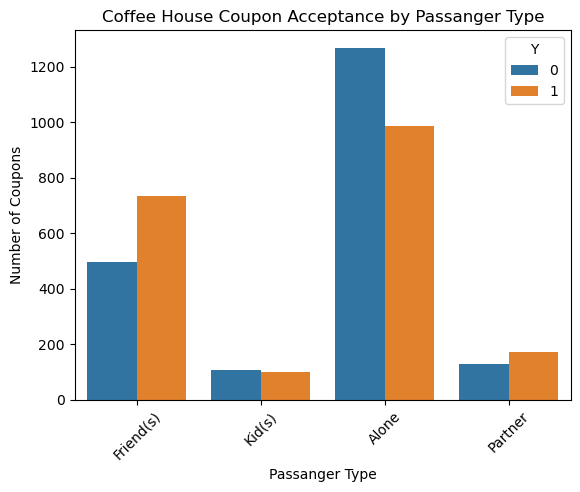

In [391]:
# Create a barplot that demonstrates the acceptance rate of Coffee House coupon by passanger type 

sns.countplot(x='passanger', data=data_coffee, hue='Y')
plt.xlabel('Passanger Type')
plt.ylabel('Number of Coupons')
plt.title('Coffee House Coupon Acceptance by Passanger Type')
plt.xticks(rotation=45)

4. Compare the acceptance rate between drivers with no passanger(s) who received a coupon to a Coffee House at 10am to the all others. Is there a difference?

In [335]:
# Acceptance rate for drivers with no passanger(s) who received a coupon to a Coffee House at 10am
coffee_alone = data_coffee.loc[data_coffee['passanger'].isin(['Alone']), :]
coffee_alone_10am = coffee_alone.loc[coffee_alone['time'].isin(['10AM']), :]
coffee_alone_10am_accept = np.mean(coffee_alone_10am['Y'])
coffee_alone_10am_accept

0.6145552560646901

In [337]:
# Acceptance rate of all other drivers
excluded_coffee_alone_10am = data_coffee.loc[~(data_coffee['passanger'].isin(['Alone'])) 
                                             | ~data_coffee['time'].isin(['10AM']), :]
excluded_coffee_alone_10am_accept = np.mean(excluded_coffee_alone_10am['Y'])
excluded_coffee_alone_10am_accept

0.48744827586206896

5. Compare the acceptance rates between those drivers who:
- go to Coffee House four or more times a month, had no urgent place destination, and temperature was obove 60 degrees
- go to Coffee House four or more times a month and received the coupon in the afternoon OR
- were alone in the car and the Coffee House was in the opposit direction Or
- received a coupon expiring in 1d and were under the age of 30

In [352]:
# Drivers who go to Coffee House four or more times a month, had no urgent place destination, and temperature was obove 60 degrees

more4_coffee = data_coffee.loc[data_coffee['CoffeeHouse'].isin(['4~8','gt8']), :]
nourgent_more4_coffee = more4_coffee.loc[more4_coffee['destination'].isin(['No Urgent Place']), :]
above60_nourgent_more4_coffee = nourgent_more4_coffee.loc[nourgent_more4_coffee['temperature']>60]
above60_nourgent_more4_coffee_accept = np.mean(above60_nourgent_more4_coffee['Y'])
above60_nourgent_more4_coffee_accept

0.7427652733118971

In [359]:
# Drivers who go to Coffee House four or more times a month and received the coupon in the afternoon

more4_coffee = data_coffee.loc[data_coffee['CoffeeHouse'].isin(['4~8','gt8']), :]
afternoon_more4_coffee = more4_coffee.loc[more4_coffee['time'].isin(['2PM','6PM','10PM']), :]
afternoon_more4_coffee_accept = np.mean(afternoon_more4_coffee['Y'])
afternoon_more4_coffee_accept

0.6263048016701461

In [363]:
# Drivers how were alone in the car and the Coffee House was in the opposit direction 

coffee_alone = data_coffee.loc[data_coffee['passanger'].isin(['Alone']), :]
opposit_coffee_alone = coffee_alone.loc[coffee_alone['direction_opp'] == 1]
opposit_coffee_alone_accept = np.mean(opposit_coffee_alone['Y'])
opposit_coffee_alone_accept

0.3976982097186701

In [380]:
# Drivers who received a coupon expiring in 1d and were under the age of 30

exp1d = data_coffee.loc[data_coffee['expiration'] == '1d']
exp1d_under30 = exp1d.loc[exp1d['age'].isin(['26','21','below21']), :]
exp1d_under30_accept = np.mean(exp1d_under30['Y'])
exp1d_under30_accept

0.6253012048192771

6. Based on these observations, what do you hypothesize about drivers who accepted the Coffee House coupons?

The overall acceptance rate of the Coffee House coupon is 50%. Drivers with a passenger(s) had a higher acceptance rate of 59%, compared to those who drive along at 44%. This is an interesting observation because one coupon potentially brings multiple customers into the Coffee House when the driver has a passenger(s).

Drivers with no passengers who received a coupon to a Coffee House at 10am have an acceptance rate of 61%, which is considerably higher than overall drivers with no passengers at 44%. Therefore, the timing of the coupon distribution has a high impact on the acceptance rate.

One of the highest acceptance rates of 74% had drivers who go to Coffee House four or more times a month, had no urgent destination place, and when the temperature was above 60 degrees. While the destination urgency of the driver might be unknown for the future coupon distribution, it is important to note that sending the coupon to those who go to the Coffee House more often and when the weather is above 60 degrees will result in a higher acceptance rate.
